# Algorithms Example

In [1]:
import pandas as pd

# Graduate Admissions
### The following dataset will be used to learn to predict whether a student will be "Admitted" into graduate school. 

# Load and preview data

In [2]:
df = pd.read_csv("grad_admit_.csv")
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,3.89,1,1
1,324,107,4,4.0,4.5,3.58,1,1
2,316,104,3,3.0,3.5,3.23,1,0
3,322,110,3,3.5,2.5,3.50,1,1
4,314,103,2,2.0,3.0,3.31,0,0
5,330,115,5,4.5,3.0,3.77,1,1
6,321,109,3,3.0,4.0,3.31,1,1
7,308,101,2,3.0,4.0,3.19,0,0
8,302,102,1,2.0,1.5,3.23,0,0
9,323,108,3,3.5,3.0,3.47,0,0


---

# Assuming the data has been prepared:

---

## Separate the data into X (features) and y (target).

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
X[:10]

array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   3.89,   1.  ],
       [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   3.58,   1.  ],
       [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   3.23,   1.  ],
       [322.  , 110.  ,   3.  ,   3.5 ,   2.5 ,   3.5 ,   1.  ],
       [314.  , 103.  ,   2.  ,   2.  ,   3.  ,   3.31,   0.  ],
       [330.  , 115.  ,   5.  ,   4.5 ,   3.  ,   3.77,   1.  ],
       [321.  , 109.  ,   3.  ,   3.  ,   4.  ,   3.31,   1.  ],
       [308.  , 101.  ,   2.  ,   3.  ,   4.  ,   3.19,   0.  ],
       [302.  , 102.  ,   1.  ,   2.  ,   1.5 ,   3.23,   0.  ],
       [323.  , 108.  ,   3.  ,   3.5 ,   3.  ,   3.47,   0.  ]])

In [6]:
y[:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

---

# Train-Test Split

## Split the data into train and test sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [8]:
X_train.shape, X_test.shape

((300, 7), (100, 7))

#### First 5 rows of the training set

In [9]:
X_train[:5]

array([[320.  , 110.  ,   5.  ,   5.  ,   4.5 ,   3.72,   1.  ],
       [311.  ,  98.  ,   1.  ,   1.  ,   2.5 ,   3.01,   0.  ],
       [307.  , 102.  ,   3.  ,   3.  ,   3.  ,   3.33,   0.  ],
       [298.  ,  98.  ,   2.  ,   1.5 ,   2.5 ,   3.02,   1.  ],
       [316.  , 109.  ,   4.  ,   4.5 ,   3.5 ,   3.53,   1.  ]])

---

## Standardize the data

In [10]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

#### First 5 rows of the training set with the data standardized

In [11]:
X_train_std[:5]

array([[ 0.26992182,  0.42599706,  1.681336  ,  1.58806427,  1.14713239,
         1.05163113,  0.92295821],
       [-0.52052169, -1.52762002, -1.79729021, -2.37384244, -1.04135547,
        -1.91679494, -1.08347268],
       [-0.87182992, -0.87641433, -0.0579771 , -0.39288908, -0.49423351,
        -0.57891277, -1.08347268],
       [-1.66227343, -1.52762002, -0.92763366, -1.8786041 , -1.04135547,
        -1.87498612,  0.92295821],
       [-0.08138641,  0.26319563,  0.81167945,  1.09282593,  0.05288846,
         0.25726359,  0.92295821]])

---

# Machine Learning Algorithms

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)
log_reg.score(X_test_std, y_test)

0.9

### probabilities of the predictions

In [13]:
log_reg.predict(X_test_std)[:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [14]:
log_reg.predict_proba(X_test_std)[:10]

array([[0.62070927, 0.37929073],
       [0.86195257, 0.13804743],
       [0.10932838, 0.89067162],
       [0.16348133, 0.83651867],
       [0.03679185, 0.96320815],
       [0.93047132, 0.06952868],
       [0.91682274, 0.08317726],
       [0.99648985, 0.00351015],
       [0.99892024, 0.00107976],
       [0.00179577, 0.99820423]])

---

## Support Vector Machine

In [15]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_std, y_train)
svm.score(X_test_std, y_test)

0.91

---

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train_std, y_train)
d_tree.score(X_test_std, y_test)

0.84

#### Visualize the Decision Tree

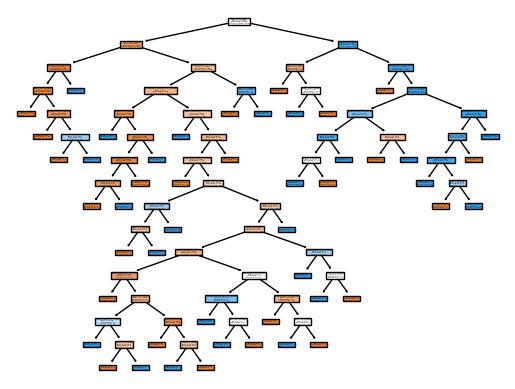

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree
feature_names = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'GPA','Research']
tree.plot_tree(d_tree,
              feature_names=feature_names,
               filled=True);

---

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train_std, y_train)
forest.score(X_test_std, y_test)

0.87

---

## K-nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
knn.score(X_test_std, y_test)

0.86